In [1]:





























# Importing essential packages to python. I imported packages that are used generally. 
# I may or may not use all of them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import os
import sklearn as skl
import scipy
import sklearn as sln
from dateutil.parser import parse
%matplotlib inline

In [2]:
# Import the amazon csv file from the folder where my python files are saved.
mydata= pd.read_csv('wages_US.csv',encoding= "ISO-8859-1",index_col=None)
mydata.head()

# The imported CSV file is converted to a Data frame(Dash board)

Dframe= pd.DataFrame(mydata)

# Top 5 rows are called with head function
Dframe.head()

,Index,Year,Month,Wages
0,1,1981,Jul,7.75
1,2,1981,Aug,7.74
2,3,1981,Sep,7.87
3,4,1981,Oct,7.89
4,5,1981,Nov,7.94


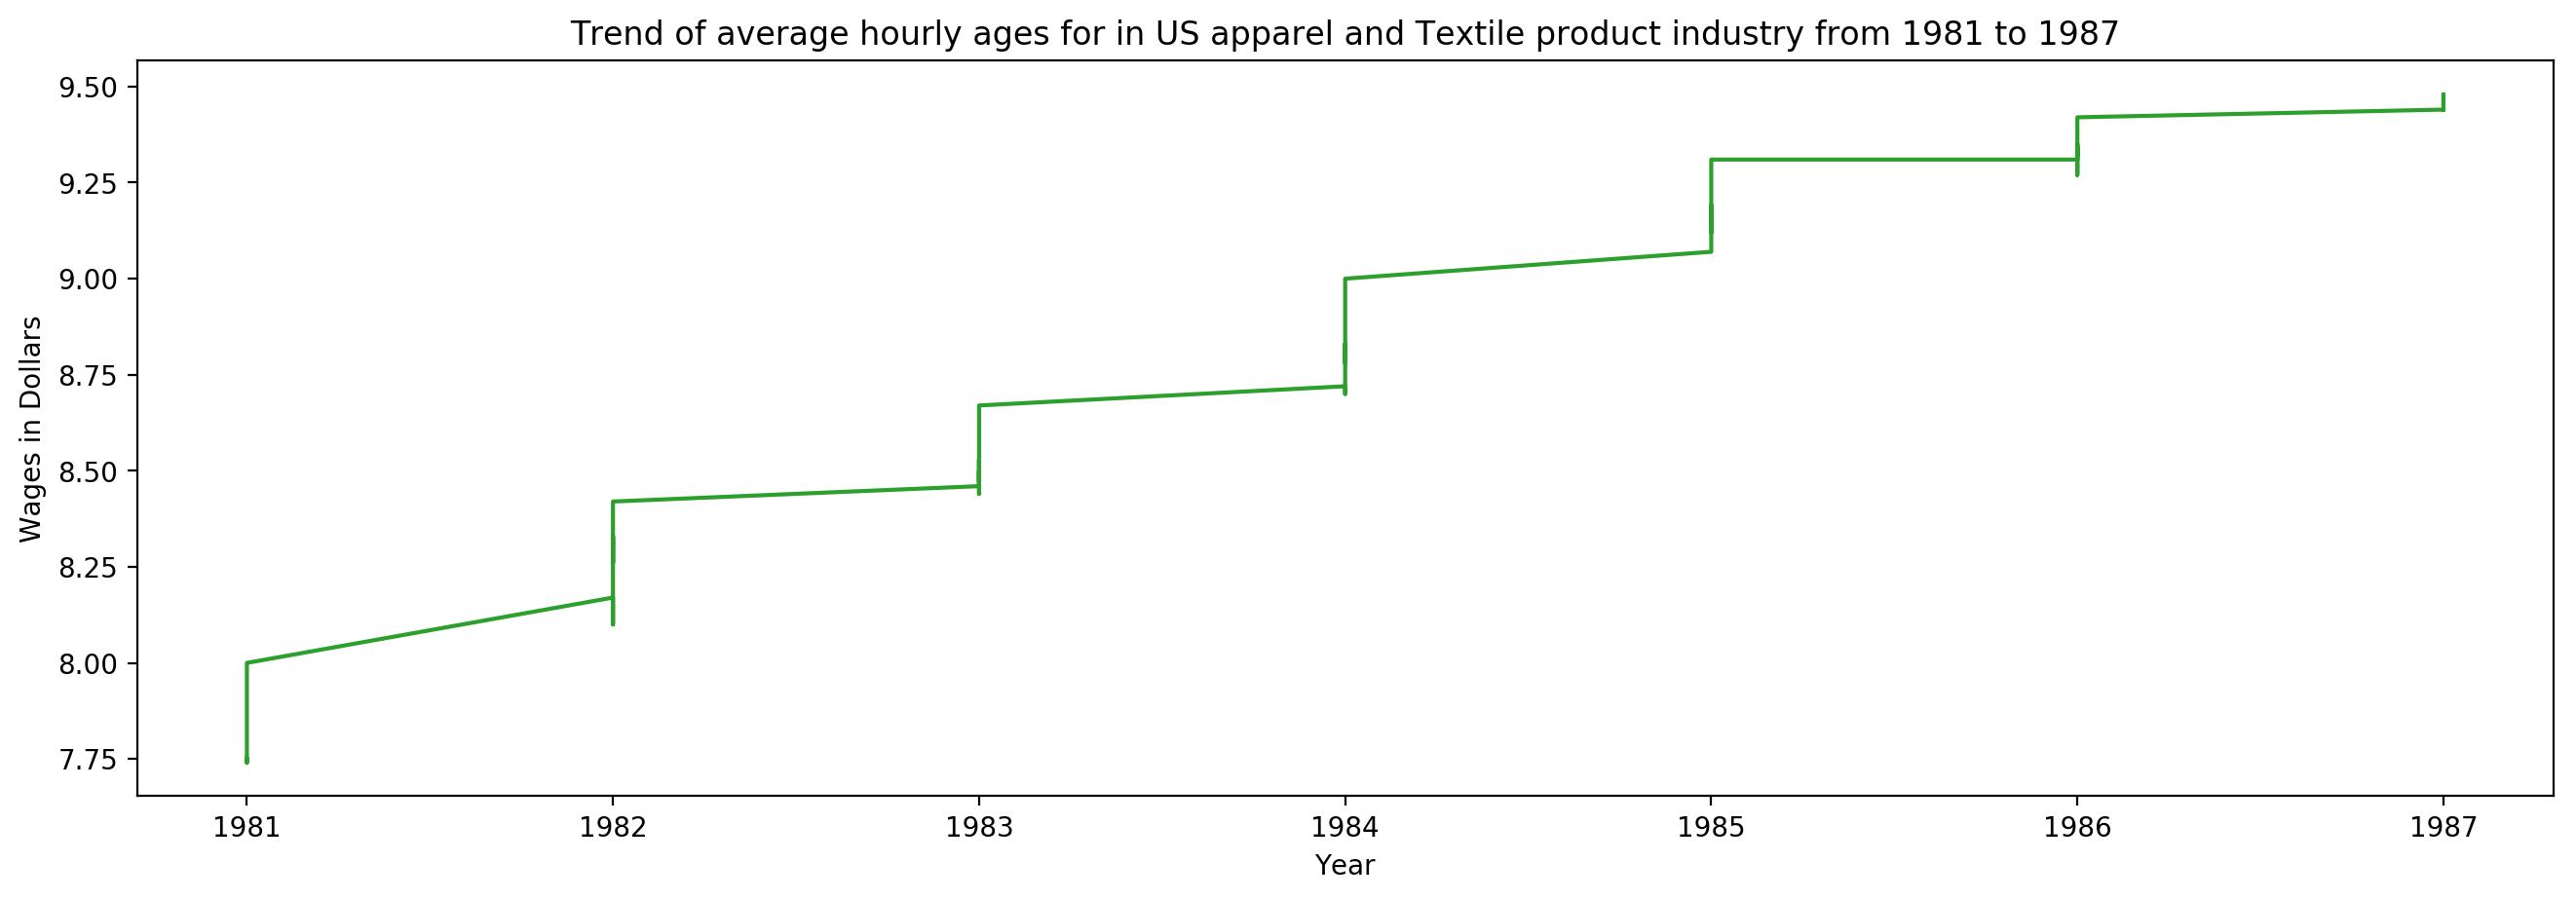

In [3]:
# Ploting the trend of average hurly wages of the workers using function
def plot_Dframe(Dframe, x, y, title="", xlabel='Year', ylabel='Wages in Dollars', dpi=200):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    
    plt.show()

plot_Dframe(Dframe, x=Dframe.Year, y=Dframe.Wages, title='Trend of average hourly ages for in US apparel and Textile product industry from 1981 to 1987')   

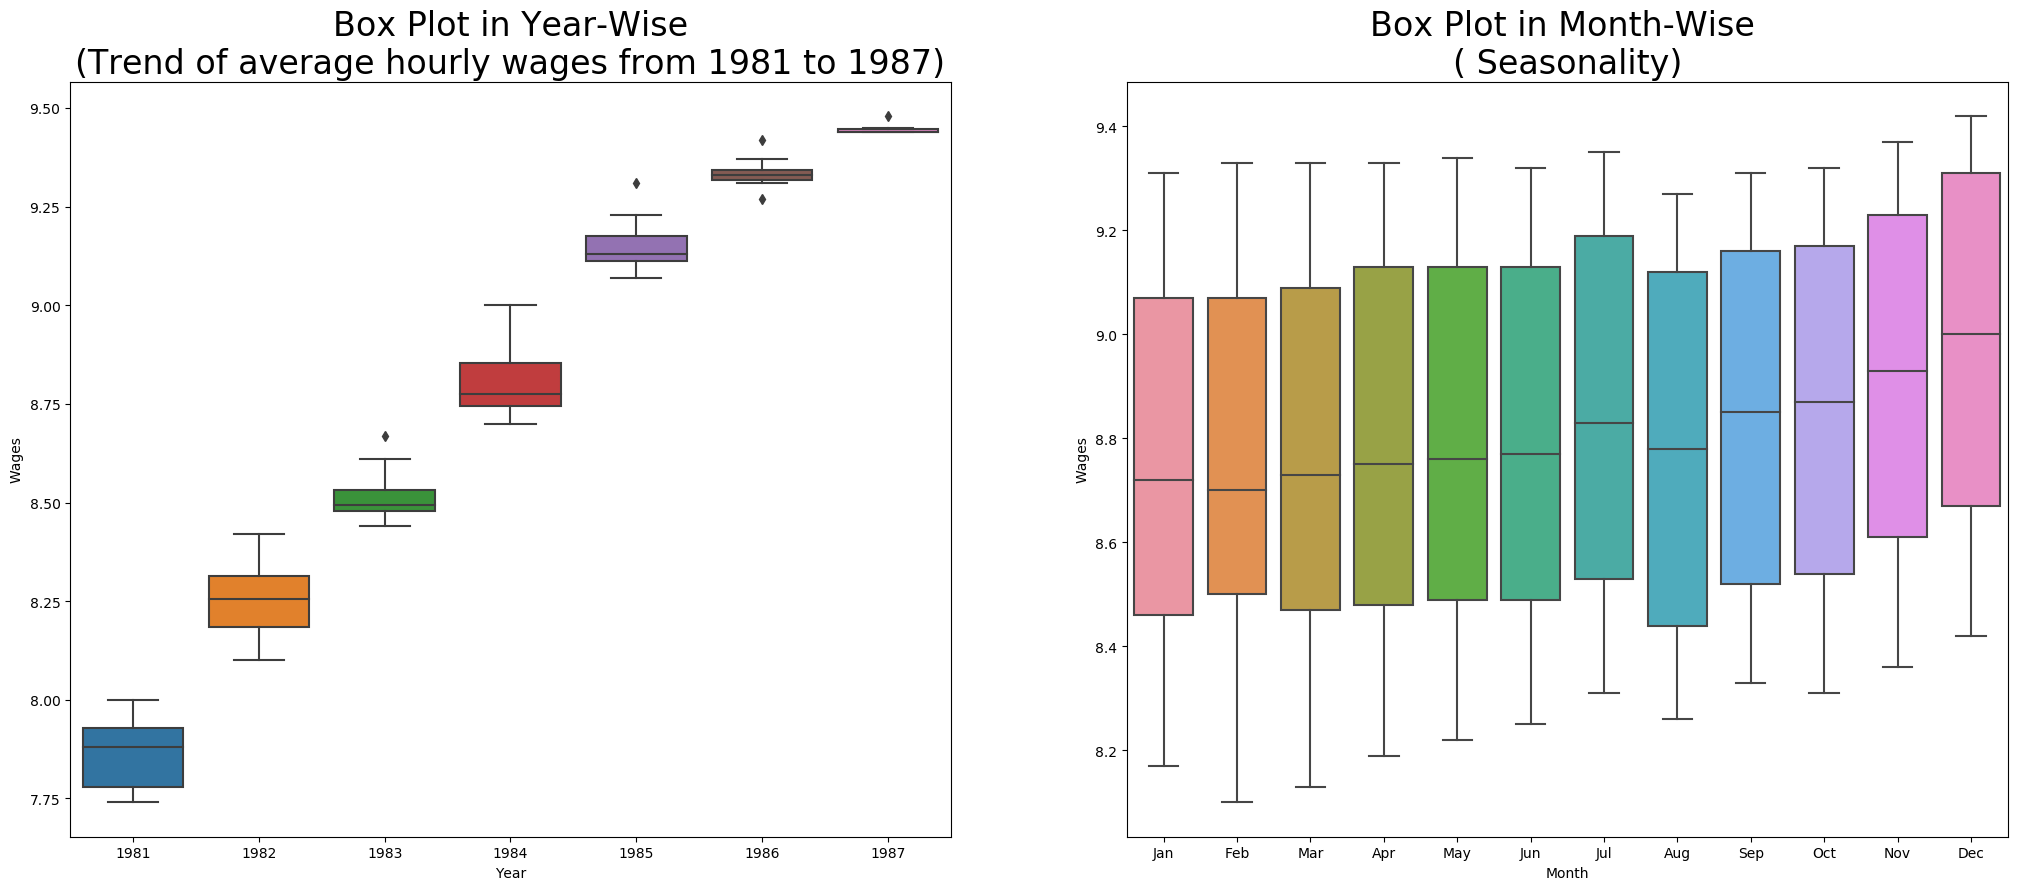

In [4]:

# Using Box Plot, We can demonstrate the trends in year wise wages. Also, it helps to show the trend of hourly
# wages in different seasons, the median and outliers(noises).

fig, axes = plt.subplots(1, 2, figsize=(25,10), dpi= 100)
sb.boxplot(x='Year', y='Wages', data=Dframe, ax=axes[0])
sb.boxplot(x='Month', y='Wages', data=Dframe.loc[~Dframe.Year.isin([1981, 1987]), :])


axes[0].set_title('Box Plot in Year-Wise\n(Trend of average hourly wages from 1981 to 1987)', fontsize=24); 
axes[1].set_title('Box Plot in Month-Wise \n( Seasonality)', fontsize=24)
plt.show()

In [5]:
del Dframe['Index']

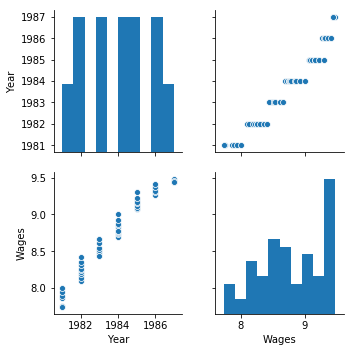

In [6]:
sb.pairplot(Dframe)

In [7]:
# Basic Descriptive Statistics
Dframe.describe()

,Year,Wages
count,72.000000,72.000000
mean,1984.000000,8.786389
std,1.792001,0.497023
min,1981.000000,7.740000
25%,1982.750000,8.435000
50%,1984.000000,8.775000
75%,1985.250000,9.280000
max,1987.000000,9.480000


In [8]:
Dframe.head()

,Year,Month,Wages
0,1981,Jul,7.75
1,1981,Aug,7.74
2,1981,Sep,7.87
3,1981,Oct,7.89
4,1981,Nov,7.94


In [9]:
Dframe['Month'].unique()

array(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

In [10]:
Eng_Month= ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun']
New_Month=[7,8,9,10,11,12,1,2,3,4,5,6]

In [11]:
#All the Months in 'Month' column are replaced by New_Month with help of following loop
z=0
for i in Dframe['Month']:
    if z<12:
        Dframe.loc[Dframe['Month'] == Eng_Month[z], 'month'] = New_Month[z]
        z=z+1
    else:
        break

In [12]:
del Dframe['Month']
Dframe.head()

,Year,Wages,month
0,1981,7.75,7.0
1,1981,7.74,8.0
2,1981,7.87,9.0
3,1981,7.89,10.0
4,1981,7.94,11.0


In [13]:
# Since it is easier to divide columns if we have the dependant variable as last column
Dframe=Dframe[['Year','month','Wages']]

In [14]:
# Begining of linear regression

from sklearn import linear_model
reg=linear_model.LinearRegression()

In [15]:
# Independent variable
X = Dframe.iloc[:,:-1]
# Dependfant variable
Y= Dframe.iloc[:,2:]

In [16]:
from sklearn.model_selection import train_test_split

# 70% of data will be used for training and 30% of data for validation

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3,random_state = 2)

In [17]:
# Linear regression is running using the training data. Developing regression model

reg.fit(X_test,Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# The slope(m) and intercept(c) of the regression model Y^=mx+c
reg.coef_

array([[0.29003845, 0.01842304]])

In [19]:
# Based on the regression model, wages are predicted for the 30% of data
Y_predict=reg.predict(X_test)
Y_predict

array([[9.56611027],
       [8.7696871 ],
       [7.93641784],
       [9.63980244],
       [8.57176386],
       [9.0413025 ],
       [9.33134095],
       [9.02287946],
       [9.07814858],
       [8.5901869 ],
       [8.78811014],
       [9.11499467],
       [8.51649473],
       [9.46030224],
       [8.17118716],
       [9.00445642],
       [8.1896102 ],
       [7.9179948 ],
       [8.24487933],
       [9.36818703],
       [8.55334082],
       [8.44280257]])

In [20]:
# Predicting the wage of the worker in 1992 October based on the Linear Regression Model

reg.predict([[1992,10]])

array([[11.16368683]])

In [21]:
from sklearn.metrics import r2_score,mean_squared_error

# How good the model is? Based on R-Square  Based on this model 96% of variation in the wages can be explained.
r2_score(Y_test,Y_predict)
rmse_lin = np.sqrt(mean_squared_error(Y_test,Y_predict))

In [22]:
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
#  RMSE is a measure of how spread out these residuals are.  
# It tells you how concentrated the data is around the line of best fit.
# RMSE is very low for this model. The standard deviation of residual wages is 0.094 dollars.

rmse_lin = np.sqrt(mean_squared_error(Y_test,Y_predict))
rmse_lin

0.09441885488646116

In [24]:
#Quadratic modelling is a polynomial regression

from sklearn.preprocessing import PolynomialFeatures

#Out of infinite degrees of polynomial, we want quadratic modelling; Degree=2
Quadratic_features= PolynomialFeatures(degree=2)

# Transforming the training data to quadratic form
X_trainpoly = Quadratic_features.fit_transform(X_train)


Quadratic_model = linear_model.LinearRegression()
# Fitting a linear regression model on the transformed feature
Quadratic_model.fit(X_trainpoly, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# Predicting on training data
Y_train_pred = Quadratic_model.predict(X_trainpoly) 
Y_test_pred= Quadratic_model.predict(Quadratic_features.fit_transform(X_test))
Y_test_pred

array([[9.47242038],
       [8.80377244],
       [7.85544481],
       [9.47101825],
       [8.65668027],
       [9.05224005],
       [9.27693443],
       [9.04567303],
       [9.07953001],
       [8.70083603],
       [8.82205586],
       [9.12569456],
       [8.55252488],
       [9.4390718 ],
       [8.15412891],
       [9.04382466],
       [8.17225191],
       [7.8256054 ],
       [8.25493278],
       [9.29966617],
       [8.61724317],
       [8.47971205]])

In [26]:
# How good the model is? Based on R-Square of this model 98% of variation in the wages can be explained.

Quadratic_r2= r2_score(Y_test,Y_test_pred)
Quadratic_r2

0.983571335495831

In [27]:
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
#  RMSE is a measure of how spread out these residuals are.  
# It tells you how concentrated the data is around the line of best fit.
# RMSE is very low for this model. The standard deviation of residual wages is 0.06 dollars.

rmse_quad = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
rmse_quad 


0.06591405129934441

In [28]:
# Predicting the wage of the worker in 1992 October based on the Quadratic Regression Model
Quadratic_model.predict(Quadratic_features.fit_transform([[1992,10]]))

array([[9.86484855]])

In [29]:
# Based on the R-Square value and RMSE, quadratic model(R-Square-98%, RMSE-0.06 Dollars) 
# is the best regression model compared to linear regression (R-Square-96%, RMSE-0.094 Dollars)that
# we can use to predict the wages of workers in Textile Industry in US